# Eigenvalues, Eigenvectors, and Singular Value Decomposition (SVD)

## Table of Contents
1. [Introduction to Eigenvalues and Eigenvectors](#intro)
2. [Mathematical Foundation](#math-foundation)
3. [Computing Eigenvalues and Eigenvectors](#computing)
4. [Diagonalization](#diagonalization)
5. [Singular Value Decomposition (SVD)](#svd)
6. [Applications of SVD](#svd-applications)
7. [Image Compression with SVD](#image-compression)
8. [Principal Component Analysis (PCA)](#pca)
9. [Advanced Topics](#advanced)

---

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import linalg
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.set_printoptions(precision=4, suppress=True)

## 1. Introduction to Eigenvalues and Eigenvectors <a name="intro"></a>

### What are Eigenvectors?

An **eigenvector** of a square matrix $A$ is a non-zero vector $\mathbf{v}$ such that when $A$ is applied to $\mathbf{v}$, the result is a scalar multiple of $\mathbf{v}$:

$$A\mathbf{v} = \lambda\mathbf{v}$$

where:
- $\mathbf{v}$ is the eigenvector (direction that doesn't change)
- $\lambda$ is the corresponding eigenvalue (the scaling factor)

In essence, when the matrix $A$ acts on its eigenvector $\mathbf{v}$, the only effect is to scale it by a constant factor $\lambda$. The direction remains unchanged, only the magnitude is affected.

### Intuition and Geometric Interpretation

Imagine a linear transformation represented by matrix multiplication. When you apply most vectors to a matrix $A$, they get stretched, compressed, AND rotated—changing both their magnitude and direction. However, **eigenvectors are special**: they are the directions that are "respected" by the transformation. When acted upon by $A$, eigenvectors only get scaled along their existing direction; they don't rotate.

**Analogy**: Think of a transformation as a rubber sheet being stretched unevenly. Most vectors rotate and stretch in complex ways. But along certain special directions (eigenvectors), the sheet just stretches uniformly without twisting—those are your eigenvectors, and the amount of stretching is the eigenvalue.

### Why Do We Care?

Eigenvalues and eigenvectors are fundamental in linear algebra for several crucial reasons:

1. **Simplification & Intuition**: Eigenvectors provide a natural coordinate system where matrix transformations are diagonal (simple scaling). This makes complex transformations easy to understand and visualize.

2. **Efficient Computation**: Instead of repeatedly multiplying by $A$ many times ($A^n\mathbf{v}$), we can use the eigenvector decomposition to compute $A^n\mathbf{v} = \lambda^n\mathbf{v}$ in just $O(1)$ operations, exponentially faster than naive matrix multiplication.

3. **Understanding System Behavior**: In dynamic systems, eigenvalues tell us about stability:
   - $|\lambda| < 1$: System decays (stable)
   - $|\lambda| = 1$: System oscillates without changing magnitude (critical)
   - $|\lambda| > 1$: System explodes (unstable)

4. **Real-World Applications**:
   - **PageRank**: Google finds the most important pages using the eigenvector of the web graph
   - **Quantum Mechanics**: Energy levels of atoms are eigenvalues of the Hamiltonian operator
   - **Stability Analysis**: Engineers use eigenvalues to determine if bridges, buildings, or aircraft are stable
   - **Vibrational Analysis**: Natural frequencies of mechanical systems are eigenvalues
   - **Image Compression & Data Analysis**: Principal Component Analysis (PCA) is based on eigenvectors
   - **Face Recognition**: Eigenvector methods like Eigenfaces use eigenvector decomposition


## 2. Mathematical Foundation <a name="math-foundation"></a>

### The Characteristic Equation

To find eigenvalues, we need to solve the fundamental equation:

$$A\mathbf{v} = \lambda\mathbf{v}$$

Rearranging this algebraic relationship:

$$A\mathbf{v} - \lambda\mathbf{v} = 0$$
$$A\mathbf{v} - \lambda I\mathbf{v} = 0$$
$$(A - \lambda I)\mathbf{v} = 0$$

This is a system of homogeneous linear equations (the right side is zero). For a homogeneous system to have non-trivial solutions (i.e., solutions other than $\mathbf{v} = \mathbf{0}$), the coefficient matrix $(A - \lambda I)$ must be **singular** (non-invertible). A matrix is singular if and only if its determinant is zero:

$$\det(A - \lambda I) = 0$$

This equation is called the **characteristic equation** of matrix $A$. It's a polynomial equation of degree $n$ (where $A$ is $n \times n$), called the **characteristic polynomial**. Its roots are exactly the eigenvalues of $A$.

**Key Insight**: By setting the determinant to zero, we're finding the values of $\lambda$ for which the system $(A - \lambda I)\mathbf{v} = 0$ has more than just the trivial solution.

### Solving for Eigenvectors

Once we find each eigenvalue $\lambda_i$ from the characteristic equation, we substitute it back into $(A - \lambda_i I)\mathbf{v} = 0$ and solve for the corresponding eigenvector(s). The solution space forms the **eigenspace** of that eigenvalue, which may contain multiple linearly independent eigenvectors.

### Important Properties of Eigenvalues

1. **Trace Property**: The sum of all eigenvalues equals the trace (sum of diagonal elements):
   $$\text{trace}(A) = \sum_{i=1}^{n} \lambda_i$$
   **Why?** The trace is equal to the coefficient of the second-highest power term in the characteristic polynomial.

2. **Determinant Property**: The product of all eigenvalues equals the determinant:
   $$\det(A) = \prod_{i=1}^{n} \lambda_i$$
   **Why?** This follows from the characteristic polynomial evaluated at $\lambda = 0$.
   **Consequence**: If any eigenvalue is zero, the matrix is singular (non-invertible).

3. **Symmetric Matrices**: All eigenvalues of symmetric matrices (where $A = A^T$) are **guaranteed to be real numbers**. This is important because:
   - We don't need to worry about complex eigenvalues
   - The eigenvectors are real-valued
   - The eigenvectors are orthogonal to each other

4. **Positive Definite Matrices**: A symmetric matrix is positive definite if and only if **all its eigenvalues are positive**. This is crucial in optimization and statistics.

5. **Matrix Power**: If the eigenvalues are $\lambda_1, \lambda_2, ..., \lambda_n$, then $A^k$ has eigenvalues $\lambda_1^k, \lambda_2^k, ..., \lambda_n^k$ with the same eigenvectors.

## 3. Computing Eigenvalues and Eigenvectors <a name="computing"></a>

### Example 1: 2×2 Matrix

In [ ]:
# Define a 2x2 matrix
A = np.array([[4, -2],
              [1,  1]])

print("Matrix A:")
print(A)
print(f"\nTrace of A: {np.trace(A)}")
print(f"Determinant of A: {np.linalg.det(A)}")

Matrix A:
[[ 4 -2]
 [ 1  1]]

Trace of A: 5
Determinant of A: 6.0


In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:")
print(eigenvalues)
print(f"\nSum of eigenvalues: {np.sum(eigenvalues):.4f} (should equal trace)")
print(f"Product of eigenvalues: {np.prod(eigenvalues):.4f} (should equal determinant)")

print("\nEigenvectors (as columns):")
print(eigenvectors)

Eigenvalues:
[3. 2.]

Sum of eigenvalues: 5.0000 (should equal trace)
Product of eigenvalues: 6.0000 (should equal determinant)

Eigenvectors (as columns):
[[0.8944 0.7071]
 [0.4472 0.7071]]


In [ ]:
# Verify the eigenvalue equation: Av = λv
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    
    Av = A @ v
    lam_v = lam * v
    
    print(f"\nEigenvalue {i+1}: λ = {lam:.4f}")
    print(f"Eigenvector: v = {v}")
    print(f"Av = {Av}")
    print(f"λv = {lam_v}")
    print(f"Difference: {np.linalg.norm(Av - lam_v):.10f}")


Eigenvalue 1: λ = 3.0000
Eigenvector: v = [0.8944 0.4472]
Av = [2.6833 1.3416]
λv = [2.6833 1.3416]
Difference: 0.0000000000

Eigenvalue 2: λ = 2.0000
Eigenvector: v = [0.7071 0.7071]
Av = [1.4142 1.4142]
λv = [1.4142 1.4142]
Difference: 0.0000000000


### Visualization: Eigenvectors in 2D

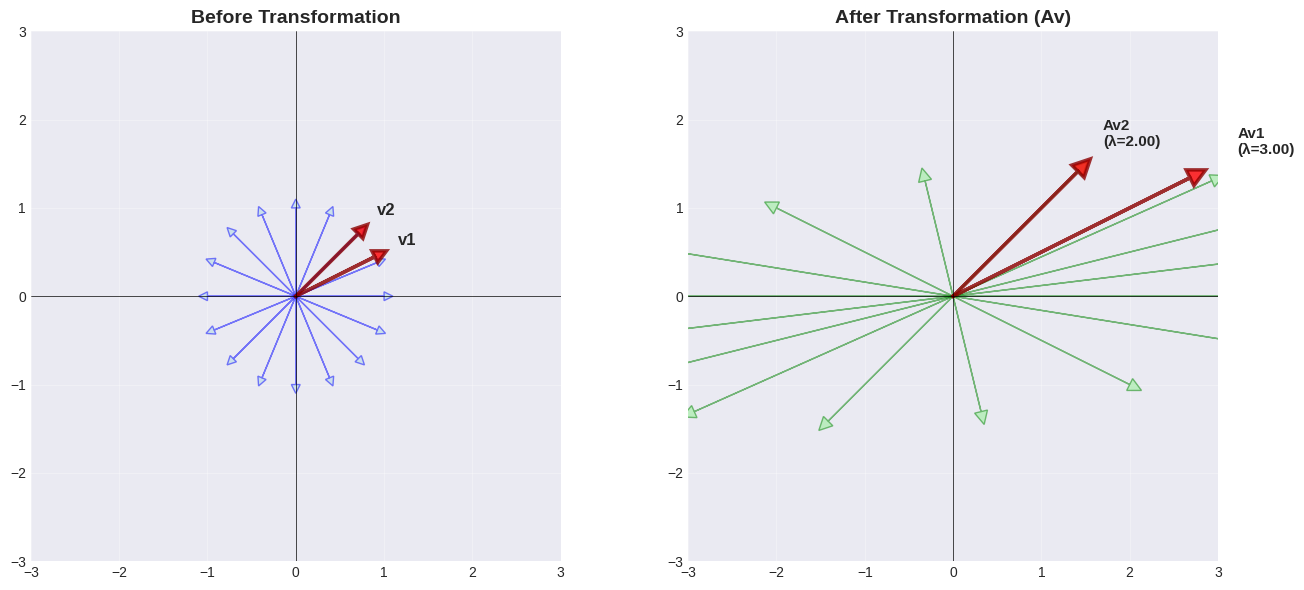

In [5]:
def plot_transformation_2d(A, eigenvalues, eigenvectors):
    """
    Visualize how a matrix transforms vectors, highlighting eigenvectors.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Create a grid of vectors
    theta = np.linspace(0, 2*np.pi, 16, endpoint=False)
    circle_vectors = np.array([np.cos(theta), np.sin(theta)])
    
    # Before transformation
    ax = axes[0]
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_title('Before Transformation', fontsize=14, fontweight='bold')
    
    # Plot unit circle vectors
    for i in range(circle_vectors.shape[1]):
        v = circle_vectors[:, i]
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, 
                fc='lightblue', ec='blue', alpha=0.5, linewidth=1)
    
    # Plot eigenvectors in red
    for i in range(eigenvectors.shape[1]):
        v = eigenvectors[:, i]
        ax.arrow(0, 0, v[0], v[1], head_width=0.15, head_length=0.15,
                fc='red', ec='darkred', linewidth=2.5, alpha=0.8)
        ax.text(v[0]*1.3, v[1]*1.3, f'v{i+1}', fontsize=12, fontweight='bold')
    
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    
    # After transformation
    ax = axes[1]
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_title('After Transformation (Av)', fontsize=14, fontweight='bold')
    
    # Transform and plot
    transformed = A @ circle_vectors
    for i in range(transformed.shape[1]):
        v = transformed[:, i]
        ax.arrow(0, 0, v[0], v[1], head_width=0.15, head_length=0.15,
                fc='lightgreen', ec='green', alpha=0.5, linewidth=1)
    
    # Plot transformed eigenvectors (should be parallel to original)
    for i in range(eigenvectors.shape[1]):
        v = eigenvectors[:, i]
        v_transformed = A @ v
        ax.arrow(0, 0, v_transformed[0], v_transformed[1], 
                head_width=0.2, head_length=0.2,
                fc='red', ec='darkred', linewidth=2.5, alpha=0.8)
        ax.text(v_transformed[0]*1.2, v_transformed[1]*1.2, 
               f'Av{i+1}\n(λ={eigenvalues[i]:.2f})', 
               fontsize=11, fontweight='bold')
    
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    
    plt.tight_layout()
    plt.show()

plot_transformation_2d(A, eigenvalues, eigenvectors)

### Example 2: Symmetric Matrix (Always Real Eigenvalues)

In [ ]:
# Symmetric matrix
S = np.array([[3, 1],
              [1, 3]])

print("Symmetric Matrix S:")
print(S)
print(f"\nIs symmetric? {np.allclose(S, S.T)}")

# Compute eigenvalues and eigenvectors
eig_vals_s, eig_vecs_s = np.linalg.eig(S)

print("\nEigenvalues (all real for symmetric matrices):")
print(eig_vals_s)

print("\nEigenvectors:")
print(eig_vecs_s)

# Check orthogonality of eigenvectors
dot_product = np.dot(eig_vecs_s[:, 0], eig_vecs_s[:, 1])
print(f"\nDot product of eigenvectors: {dot_product:.10f}")
print("(Should be 0 for symmetric matrices - eigenvectors are orthogonal)")

Symmetric Matrix S:
[[3 1]
 [1 3]]

Is symmetric? True

Eigenvalues (all real for symmetric matrices):
[4. 2.]

Eigenvectors:
[[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]

Dot product of eigenvectors: 0.0000000000
(Should be 0 for symmetric matrices - eigenvectors are orthogonal)


### Example 3: 3×3 Matrix

In [ ]:
# 3x3 matrix
B = np.array([[6, -3, -2],
              [4, -1, -2],
              [10, -5, -3]])

print("Matrix B:")
print(B)

# Compute eigenvalues and eigenvectors
eig_vals_b, eig_vecs_b = np.linalg.eig(B)

print("\nEigenvalues:")
for i, lam in enumerate(eig_vals_b):
    print(f"λ{i+1} = {lam:.4f}")

print("\nEigenvectors:")
print(eig_vecs_b)

Matrix B:
[[ 6 -3 -2]
 [ 4 -1 -2]
 [10 -5 -3]]

Eigenvalues:
λ1 = 0.0000+1.0000j
λ2 = 0.0000-1.0000j
λ3 = 2.0000+0.0000j

Eigenvectors:
[[0.4472+0.1491j 0.4472-0.1491j 0.4472+0.j    ]
 [0.4472+0.1491j 0.4472-0.1491j 0.    +0.j    ]
 [0.7454+0.j     0.7454-0.j     0.8944+0.j    ]]


## 4. Diagonalization <a name="diagonalization"></a>

### Theory: Fundamental Decomposition

A matrix $A$ is **diagonalizable** if it can be written as:

$$A = PDP^{-1}$$

where:
- $P$ is a matrix whose columns are the eigenvectors of $A$ (arranged as column vectors)
- $D$ is a diagonal matrix with eigenvalues on the diagonal: $D = \text{diag}(\lambda_1, \lambda_2, ..., \lambda_n)$
- $P^{-1}$ is the inverse of $P$

**Key Requirement**: Not all matrices are diagonalizable. A matrix $A$ is diagonalizable if and only if it has $n$ linearly independent eigenvectors (where $A$ is $n \times n$). 

**Special Case**: All symmetric matrices are diagonalizable (in fact, orthogonally diagonalizable).

### Mathematical Insight

When we compute $AP$, where $P = [\mathbf{v}_1 | \mathbf{v}_2 | ... | \mathbf{v}_n]$:

$$AP = A[\mathbf{v}_1 | \mathbf{v}_2 | ... | \mathbf{v}_n] = [A\mathbf{v}_1 | A\mathbf{v}_2 | ... | A\mathbf{v}_n]$$

Since $A\mathbf{v}_i = \lambda_i\mathbf{v}_i$:

$$AP = [\lambda_1\mathbf{v}_1 | \lambda_2\mathbf{v}_2 | ... | \lambda_n\mathbf{v}_n] = P[\lambda_1 | \lambda_2 | ... | \lambda_n] = PD$$

This means $AP = PD$, which rearranges to $A = PDP^{-1}$. This elegant relationship shows that eigenvectors and eigenvalues encode everything about how $A$ transforms space.

### Why is this useful?

Diagonalization is incredibly powerful for computation:

**Computing Matrix Powers**:
$$A^n = (PDP^{-1})^n = PDP^{-1}PDP^{-1}...PDP^{-1} = PD^nP^{-1}$$

Since $D$ is diagonal, computing $D^n$ is trivial:
$$D^n = \begin{bmatrix} \lambda_1^n & 0 & ... & 0 \\ 0 & \lambda_2^n & ... & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & ... & \lambda_n^n \end{bmatrix}$$

Instead of doing $n$ matrix multiplications (which costs $O(n^3)$ per multiplication), we just raise $n$ scalars to the $n$-th power (which costs $O(n \log n)$). For large $n$, this is exponentially faster!

**Matrix Exponentials**: It's used to solve differential equations like $\frac{d\mathbf{x}}{dt} = A\mathbf{x}$ using the matrix exponential $e^{At} = Pe^{Dt}P^{-1}$.

**System Analysis**: Many problems in engineering and physics reduce to analyzing $P$, $D$, and $P^{-1}$, which are much simpler than $A$ itself.

In [ ]:
# Diagonalization example
A = np.array([[4, -2],
              [1,  1]])

eigenvalues, P = np.linalg.eig(A)
D = np.diag(eigenvalues)

print("Original matrix A:")
print(A)

print("\nMatrix P (eigenvectors as columns):")
print(P)

print("\nDiagonal matrix D (eigenvalues):")
print(D)

print("\nInverse of P:")
P_inv = np.linalg.inv(P)
print(P_inv)

# Verify: A = PDP^(-1)
A_reconstructed = P @ D @ P_inv
print("\nReconstructed A = PDP^(-1):")
print(A_reconstructed)

print("\nDifference (should be near zero):")
print(A - A_reconstructed)

Original matrix A:
[[ 4 -2]
 [ 1  1]]

Matrix P (eigenvectors as columns):
[[0.8944 0.7071]
 [0.4472 0.7071]]

Diagonal matrix D (eigenvalues):
[[3. 0.]
 [0. 2.]]

Inverse of P:
[[ 2.2361 -2.2361]
 [-1.4142  2.8284]]

Reconstructed A = PDP^(-1):
[[ 4. -2.]
 [ 1.  1.]]

Difference (should be near zero):
[[0. 0.]
 [0. 0.]]


In [ ]:
# Computing A^n efficiently using diagonalization
n = 10

# Method 1: Direct computation (slow for large n)
A_n_direct = np.linalg.matrix_power(A, n)

# Method 2: Using diagonalization (fast)
D_n = np.diag(eigenvalues**n)
A_n_diag = P @ D_n @ P_inv

print(f"A^{n} computed directly:")
print(A_n_direct)

print(f"\nA^{n} computed using diagonalization:")
print(A_n_diag)

print("\nDifference:")
print(np.abs(A_n_direct - A_n_diag))

A^10 computed directly:
[[ 117074 -116050]
 [  58025  -57001]]

A^10 computed using diagonalization:
[[ 117074. -116050.]
 [  58025.  -57001.]]

Difference:
[[0. 0.]
 [0. 0.]]


## 5. Singular Value Decomposition (SVD) <a name="svd"></a>

### Introduction: The Most Important Matrix Decomposition

Singular Value Decomposition (SVD) is arguably the most important matrix decomposition in numerical linear algebra. Unlike eigendecomposition, which only applies to square matrices, **SVD works for any matrix of any shape** (rectangular, square, tall, wide—it doesn't matter). This universality makes SVD incredibly powerful and widely used in real-world applications.

### Mathematical Definition

For any $m \times n$ matrix $A$ (rectangular or square), the SVD is:

$$A = U\Sigma V^T$$

where:
- $U$ is an $m \times m$ orthogonal matrix (left singular vectors) - contains the row space directions
- $\Sigma$ is an $m \times n$ diagonal matrix (singular values) - contains the stretching factors
- $V^T$ is an $n \times n$ orthogonal matrix (right singular vectors transposed) - contains column space directions

**Orthogonal Matrices**: A matrix $Q$ is orthogonal when $Q^TQ = QQ^T = I$. This means:
- Its columns are orthonormal (perpendicular unit vectors)
- Its rows are orthonormal
- It preserves lengths and angles (it's a pure rotation/reflection with no scaling)

### Key Properties of SVD

1. **Non-negative Singular Values**: All singular values in $\Sigma$ are non-negative real numbers. They are typically ordered in decreasing magnitude:
   $$\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r \geq 0$$
   where $r = \text{rank}(A)$ is the number of non-zero singular values.
   
   **Interpretation**: The $i$-th singular value shows how much the transformation stretches in the direction of the $i$-th principal axis.


2. **Orthogonality Properties**: The singular vectors form orthonormal bases:| Pseudoinverse | Undefined for non-square | **Well-defined** |

   - $U^TU = I$ (columns of $U$ are orthonormal)| Computing powers | Efficient if diagonalizable | **Built for compression** |

   - $V^TV = I$ (columns of $V$ are orthonormal)| Numerical stability | Can be unstable | **Highly stable** |

   - This means distances and angles are preserved when we apply $U$ or $V$| Always exists? | Not always (singular, complex) | **Always exists** |

| Applies to | Square matrices only | **Any matrix** |

3. **Relationship to Eigendecomposition**:|----------|-------------------|-----|

   - The $k$-th column of $U$ is an eigenvector of $AA^T$ (the Gram matrix)| Property | Eigendecomposition | SVD |

   - The $k$-th column of $V$ is an eigenvector of $A^TA$

   - The singular value $\sigma_k$ is the square root of the corresponding eigenvalue### Why SVD is Superior to Eigendecomposition



4. **Connection to Matrix Structure**:Similarly, $AA^T = U\Sigma^2U^T$, so the eigenvalues of $AA^T$ are also the squares of the singular values.

   - If $\text{rank}(A) = r < n$, then $\sigma_{r+1} = ... = \sigma_n = 0$

   - The number of non-zero singular values equals the rank of $A$- Therefore: singular values of $A$ = $\sqrt{\text{eigenvalues of } A^TA}$

   - The null space of $A$ is spanned by the right singular vectors corresponding to zero singular values- The eigenvectors of $A^TA$ are the columns of $V$

- The eigenvalues of $A^TA$ are $\sigma_1^2, \sigma_2^2, ..., \sigma_n^2$

### Relationship to Eigenvalues: The Gram Matrix ConnectionThis shows that:



The singular values of $A$ are directly related to the eigenvalues of $A^TA$:where $\Sigma^2 = \text{diag}(\sigma_1^2, \sigma_2^2, ..., \sigma_n^2)$.


$$A^TA = (U\Sigma V^T)^T(U\Sigma V^T) = V\Sigma^T U^T U\Sigma V^T = V\Sigma^T\Sigma V^T = V\Sigma^2 V^T$$

In [10]:
# Example: SVD of a rectangular matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

print("Original matrix A (4×3):")
print(A)
print(f"Shape: {A.shape}")

# Compute SVD
U, s, VT = np.linalg.svd(A, full_matrices=True)

print("\n" + "="*60)
print("SVD DECOMPOSITION: A = UΣV^T")
print("="*60)

print("\nU matrix (left singular vectors):")
print(U)
print(f"Shape: {U.shape}")

print("\nSingular values:")
print(s)

print("\nV^T matrix (right singular vectors transposed):")
print(VT)
print(f"Shape: {VT.shape}")

Original matrix A (4×3):
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Shape: (4, 3)

SVD DECOMPOSITION: A = UΣV^T

U matrix (left singular vectors):
[[-0.1409 -0.8247  0.54   -0.0917]
 [-0.3439 -0.4263 -0.6517  0.5247]
 [-0.547  -0.0278 -0.3167 -0.7744]
 [-0.7501  0.3706  0.4283  0.3414]]
Shape: (4, 4)

Singular values:
[25.4624  1.2907  0.    ]

V^T matrix (right singular vectors transposed):
[[-0.5045 -0.5745 -0.6445]
 [ 0.7608  0.0571 -0.6465]
 [-0.4082  0.8165 -0.4082]]
Shape: (3, 3)


In [ ]:
# Verify orthogonality of U and V
print("Verifying orthogonality:")
print("\nU^T U (should be identity):")
print(U.T @ U)

V = VT.T
print("\nV^T V (should be identity):")
print(VT @ V)

Verifying orthogonality:

U^T U (should be identity):
[[ 1.  0. -0.  0.]
 [ 0.  1. -0.  0.]
 [-0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]

V^T V (should be identity):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# Reconstruct A from U, Σ, and V^T
# Need to create the full Σ matrix with correct shape
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:len(s), :len(s)] = np.diag(s)

print("Σ matrix (full):")
print(Sigma)
print(f"Shape: {Sigma.shape}")

# Reconstruct
A_reconstructed = U @ Sigma @ VT

print("\nReconstructed A = UΣV^T:")
print(A_reconstructed)

print("\nDifference from original (should be near zero):")
print(np.abs(A - A_reconstructed))
print(f"\nMax absolute error: {np.max(np.abs(A - A_reconstructed)):.2e}")

Σ matrix (full):
[[25.4624  0.      0.    ]
 [ 0.      1.2907  0.    ]
 [ 0.      0.      0.    ]
 [ 0.      0.      0.    ]]
Shape: (4, 3)

Reconstructed A = UΣV^T:
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]

Difference from original (should be near zero):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Max absolute error: 7.55e-15


### Geometric Interpretation of SVD

SVD provides a beautiful geometric decomposition of any linear transformation into three simple pieces:

**$A = U \cdot \Sigma \cdot V^T$** can be understood as:


1. **First Rotation** ($V^T$): The matrix $V^T$ performs an orthogonal transformation (rotation/reflection) that aligns the input space with the principal axes of the transformation. It reorients the coordinate system so that the transformation becomes aligned with the axes.**Geometric Meaning of Singular Values**: If we start with a unit sphere in the input space ($||\mathbf{x}|| = 1$), after applying $A$, it becomes an ellipsoid. The singular values are exactly the lengths of the principal axes of that ellipsoid! The largest singular value is the length of the longest axis, the second largest is the length of the second-longest axis, and so on.



2. **Scaling Along Axes** ($\Sigma$): After rotation, the matrix $\Sigma$ performs simple axis-aligned stretching/compression. Each direction is scaled independently by a singular value. Directions with larger singular values are stretched more; those with smaller values are compressed.**Key Insight**: Any linear transformation—no matter how complicated it looks—can be decomposed into rotation, then scaling, then rotation. This trio of operations is guaranteed to always exist and is numerically stable to compute.


3. **Second Rotation** ($U$): Finally, $U$ performs another rotation/reflection to align the result with the desired output coordinate system.

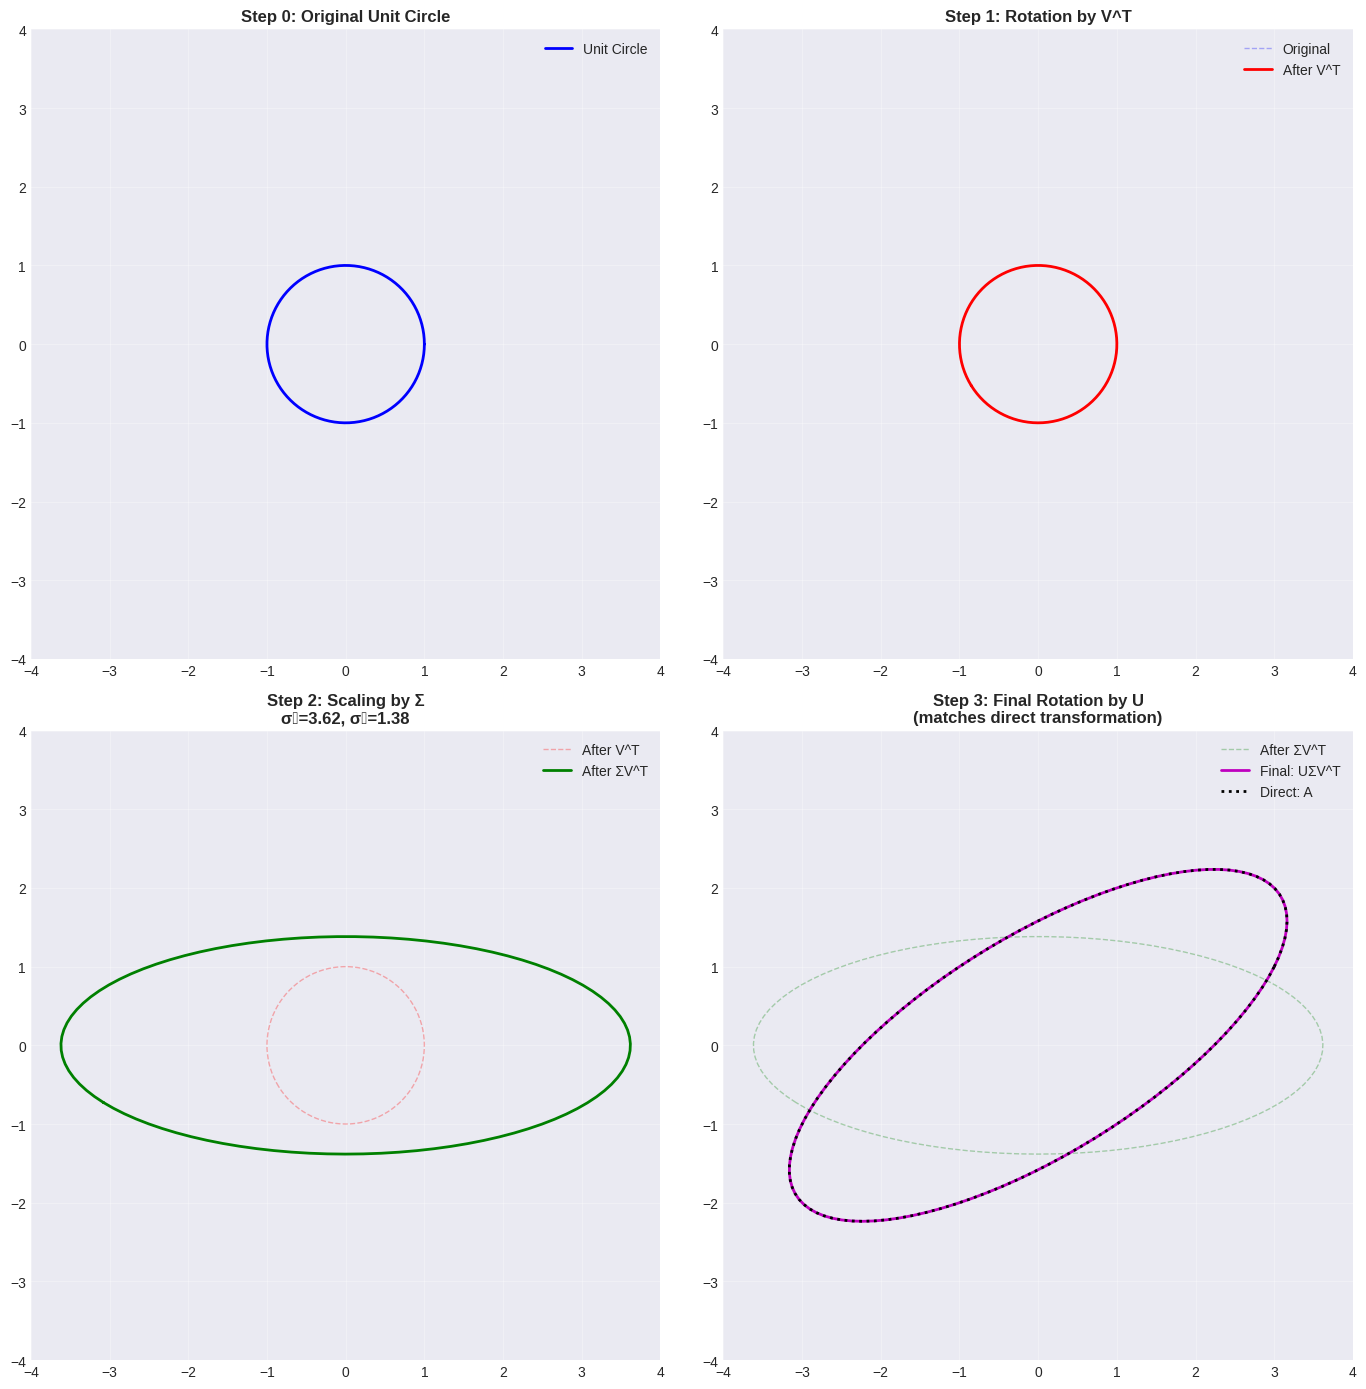


SVD Components:

U (final rotation):
[[-0.8507 -0.5257]
 [-0.5257  0.8507]]

Σ (scaling):
[[3.618 0.   ]
 [0.    1.382]]

V^T (initial rotation):
[[-0.8507 -0.5257]
 [-0.5257  0.8507]]


In [13]:
# Visualizing SVD components
def visualize_svd_2d():
    """
    Visualize how SVD decomposes a transformation.
    """
    # Create a 2x2 matrix
    A = np.array([[3, 1],
                  [1, 2]])
    
    # Compute SVD
    U, s, VT = np.linalg.svd(A)
    Sigma = np.diag(s)
    
    # Create unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])
    
    # Apply transformations step by step
    step1 = VT @ circle  # First rotation
    step2 = Sigma @ step1  # Scaling
    step3 = U @ step2  # Second rotation (final result)
    
    # Also compute direct transformation
    direct = A @ circle
    
    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    
    # Original circle
    ax = axes[0, 0]
    ax.plot(circle[0], circle[1], 'b-', linewidth=2, label='Unit Circle')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title('Step 0: Original Unit Circle', fontsize=12, fontweight='bold')
    ax.legend()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    
    # After V^T (first rotation)
    ax = axes[0, 1]
    ax.plot(circle[0], circle[1], 'b--', linewidth=1, alpha=0.3, label='Original')
    ax.plot(step1[0], step1[1], 'r-', linewidth=2, label='After V^T')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title('Step 1: Rotation by V^T', fontsize=12, fontweight='bold')
    ax.legend()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    
    # After Σ (scaling)
    ax = axes[1, 0]
    ax.plot(step1[0], step1[1], 'r--', linewidth=1, alpha=0.3, label='After V^T')
    ax.plot(step2[0], step2[1], 'g-', linewidth=2, label='After ΣV^T')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(f'Step 2: Scaling by Σ\nσ₁={s[0]:.2f}, σ₂={s[1]:.2f}', 
                fontsize=12, fontweight='bold')
    ax.legend()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    
    # After U (second rotation)
    ax = axes[1, 1]
    ax.plot(step2[0], step2[1], 'g--', linewidth=1, alpha=0.3, label='After ΣV^T')
    ax.plot(step3[0], step3[1], 'm-', linewidth=2, label='Final: UΣV^T')
    ax.plot(direct[0], direct[1], 'k:', linewidth=2, label='Direct: A')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title('Step 3: Final Rotation by U\n(matches direct transformation)', 
                fontsize=12, fontweight='bold')
    ax.legend()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    
    plt.tight_layout()
    plt.show()
    
    print("\nSVD Components:")
    print(f"\nU (final rotation):\n{U}")
    print(f"\nΣ (scaling):\n{Sigma}")
    print(f"\nV^T (initial rotation):\n{VT}")

visualize_svd_2d()

## 6. Applications of SVD <a name="svd-applications"></a>

### 6.1 Low-Rank Approximation: The Eckart-Young Theorem

One of the most powerful applications of SVD is creating low-rank approximations of matrices—essentially "simplifying" complex data while preserving as much important information as possible.

**The Core Idea**: Given the full SVD $A = U\Sigma V^T$, we can create a rank-$k$ approximation by keeping only the $k$ largest singular values and setting the rest to zero:

$$A_k = U_k \Sigma_k V_k^T$$

where:
- $U_k$ contains only the first $k$ columns of $U$
- $\Sigma_k$ is a $k \times k$ diagonal matrix with the $k$ largest singular values

- $V_k^T$ contains only the first $k$ rows of $V^T$ (or equivalently, $V_k$ contains the first $k$ columns of $V$)- For $k \ll \min(m,n)$, this is a dramatic reduction!

- Rank-$k$ approximation: $k(m + n + 1)$ values

This eliminates the noise and less important information captured by the smaller singular values.- Full matrix: $m \times n$ values

**Storage Efficiency**: 

**The Eckart-Young Theorem** (fundamental theorem in approximation theory):

**Key Insight**: The singular values represent how much "energy" or "information" is associated with each direction. By keeping only large singular values and discarding small ones, we keep the important information while throwing away noise and redundancy.

$$A_k = \arg\min_{B: \text{rank}(B)=k} ||A - B||_F$$

where $||·||_F$ is the Frobenius norm. This means that the rank-$k$ approximation obtained from SVD is **optimal**—no other rank-$k$ matrix gets closer to $A$ than $A_k$ does! This is why SVD-based low-rank approximation is the standard for compression, denoising, and dimensionality reduction.

In [ ]:
# Low-rank approximation example
np.random.seed(42)
A = np.random.randn(5, 5)

print("Original matrix A:")
print(A)

# Compute SVD
U, s, VT = np.linalg.svd(A)

print("\nSingular values:")
print(s)

# Create approximations with different ranks
for k in [1, 2, 3, 5]:
    # Reconstruct using only k singular values
    Sigma_k = np.zeros((k, k))
    np.fill_diagonal(Sigma_k, s[:k])
    
    A_k = U[:, :k] @ Sigma_k @ VT[:k, :]
    
    # Compute error
    error = np.linalg.norm(A - A_k, 'fro')
    relative_error = error / np.linalg.norm(A, 'fro')
    
    print(f"\nRank-{k} approximation:")
    print(f"Frobenius norm error: {error:.6f}")
    print(f"Relative error: {relative_error:.4%}")

Original matrix A:
[[ 0.4967 -0.1383  0.6477  1.523  -0.2342]
 [-0.2341  1.5792  0.7674 -0.4695  0.5426]
 [-0.4634 -0.4657  0.242  -1.9133 -1.7249]
 [-0.5623 -1.0128  0.3142 -0.908  -1.4123]
 [ 1.4656 -0.2258  0.0675 -1.4247 -0.5444]]

Singular values:
[3.6462 2.1408 1.7365 1.2976 0.2257]

Rank-1 approximation:
Frobenius norm error: 3.055079
Relative error: 64.2240%

Rank-2 approximation:
Frobenius norm error: 2.179535
Relative error: 45.8183%

Rank-3 approximation:
Frobenius norm error: 1.317108
Relative error: 27.6883%

Rank-5 approximation:
Frobenius norm error: 0.000000
Relative error: 0.0000%


### 6.2 Matrix Pseudoinverse: Generalized Inverse

For non-square or singular matrices, the standard matrix inverse doesn't exist. SVD provides a principled way to define the **pseudoinverse** (also called the Moore-Penrose inverse):

$$A^+ = V\Sigma^+ U^T$$

where $\Sigma^+$ is obtained by:

1. Taking the reciprocal of each non-zero singular value: $\frac{1}{\sigma_i}$3. **Pattern Recognition**: Used in neural networks and machine learning for computing parameter updates

2. Keeping zero singular values as zero (don't divide by zero!)2. **Regularization**: Handles singular and ill-conditioned matrices gracefully

3. Transposing (because we're inverting an $m \times n$ matrix)1. **Least Squares Solutions**: To solve $A\mathbf{x} = \mathbf{b}$ when there's no exact solution, the pseudoinverse gives the least-squares solution $\mathbf{x} = A^+\mathbf{b}$ that minimizes $||A\mathbf{x} - \mathbf{b}||^2$

**Uses of the Pseudoinverse**:

**Properties of the Pseudoinverse**:

- $A^+$ always exists and is unique- $AA^+A = A$ and $A^+AA^+ = A^+$ (Moore-Penrose properties)

- For square invertible matrices: $A^+ = A^{-1}$- For rectangular matrices: $A^+$ is the "best" generalized inverse

In [ ]:
# Pseudoinverse example
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])

print("Matrix A (3×2):")
print(A)

# Compute pseudoinverse using SVD
U, s, VT = np.linalg.svd(A, full_matrices=False)

# Create Σ^+
Sigma_plus = np.diag(1/s)

A_plus_manual = VT.T @ Sigma_plus @ U.T

print("\nPseudoinverse A^+ (computed manually):")
print(A_plus_manual)

# Compare with numpy's built-in
A_plus_numpy = np.linalg.pinv(A)

print("\nPseudoinverse A^+ (numpy):")
print(A_plus_numpy)

print("\nDifference:")
print(np.abs(A_plus_manual - A_plus_numpy))

# Verify property: A A^+ A = A
verification = A @ A_plus_numpy @ A
print("\nVerification: A A^+ A = A?")
print(verification)
print(f"\nMax error: {np.max(np.abs(A - verification)):.2e}")

Matrix A (3×2):
[[1 2]
 [3 4]
 [5 6]]

Pseudoinverse A^+ (computed manually):
[[-1.3333 -0.3333  0.6667]
 [ 1.0833  0.3333 -0.4167]]

Pseudoinverse A^+ (numpy):
[[-1.3333 -0.3333  0.6667]
 [ 1.0833  0.3333 -0.4167]]

Difference:
[[0. 0. 0.]
 [0. 0. 0.]]

Verification: A A^+ A = A?
[[1. 2.]
 [3. 4.]
 [5. 6.]]

Max error: 1.78e-15


## 7. Image Compression with SVD <a name="image-compression"></a>

SVD is one of the most elegant and effective methods for image compression and denoising. The key insight is that real images contain tremendous amount of redundancy—adjacent pixels are similar, patterns repeat, and much of the data is "correlated". SVD automatically identifies and removes this redundancy by keeping only the most important singular values.

### How SVD-Based Compression Works:

**For Grayscale Images**:
1. Represent the image as a single $m \times n$ matrix (pixel intensity)
2. Compute the complete SVD: $A = U\Sigma V^T$
3. Select a threshold based on desired quality (keep top $k$ singular values)
4. Approximate the image as: $A_k = U_k \Sigma_k V_k^T$
5. Reconstruct and display the compressed image

**For Color Images**:

1. Decompose into three channels: Red, Green, Blue- No iterative algorithms or heuristics needed

2. Apply SVD and compression to each channel independently- Reconstruction is extremely fast: Just matrix multiply

3. Reconstruct the three channels and recombine- SVD computation is efficient: $O(mn \min(m,n))$

**Computational Efficiency**:

### Why SVD Compression Works So Well:

- **Compression ratio**: ~5.1x with minimal visual loss!

Images have structure. When you compute SVD:- With $k=50$: $50 \times 1024 + 50 = 51,250$ values

- **Large singular values** capture important patterns, edges, and structure- Full storage: $262,144$ values

- **Small singular values** typically capture noise, fine details, and redundancyFor example, with a $512 \times 512$ image:

- By discarding small singular values, we remove what humans perceive as noise while keeping what matters

- **Compression ratio**: $\frac{k(m+n+1)}{mn}$

### Storage and Computational Efficiency:- **Compressed image**: $k(m + n + 1)$ values (for rank-$k$ approximation)

- **Full image**: $m \times n$ values (for an $m \times n$ image)
**Storage Savings**:

In [16]:
# Create a synthetic image for demonstration
def create_sample_image():
    """
    Create a sample image with some patterns.
    """
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    
    # Create an interesting pattern
    Z = np.sin(np.sqrt(X**2 + Y**2)) * np.exp(-0.1*np.sqrt(X**2 + Y**2))
    Z += 0.3 * np.sin(3*X) * np.cos(2*Y)
    
    # Normalize to 0-255
    Z = ((Z - Z.min()) / (Z.max() - Z.min()) * 255).astype(np.uint8)
    
    return Z

# Create image
img = create_sample_image()

print(f"Image shape: {img.shape}")
print(f"Original storage: {img.size} values")

# Compute SVD
U, s, VT = np.linalg.svd(img, full_matrices=False)

print(f"\nNumber of singular values: {len(s)}")
print(f"\nLargest singular values: {s[:10]}")

Image shape: (200, 200)
Original storage: 40000 values

Number of singular values: 200

Largest singular values: [22029.1491  5700.67    3678.346   2380.292    189.1387    81.2412
    19.3889     9.6602     9.2212     8.972 ]


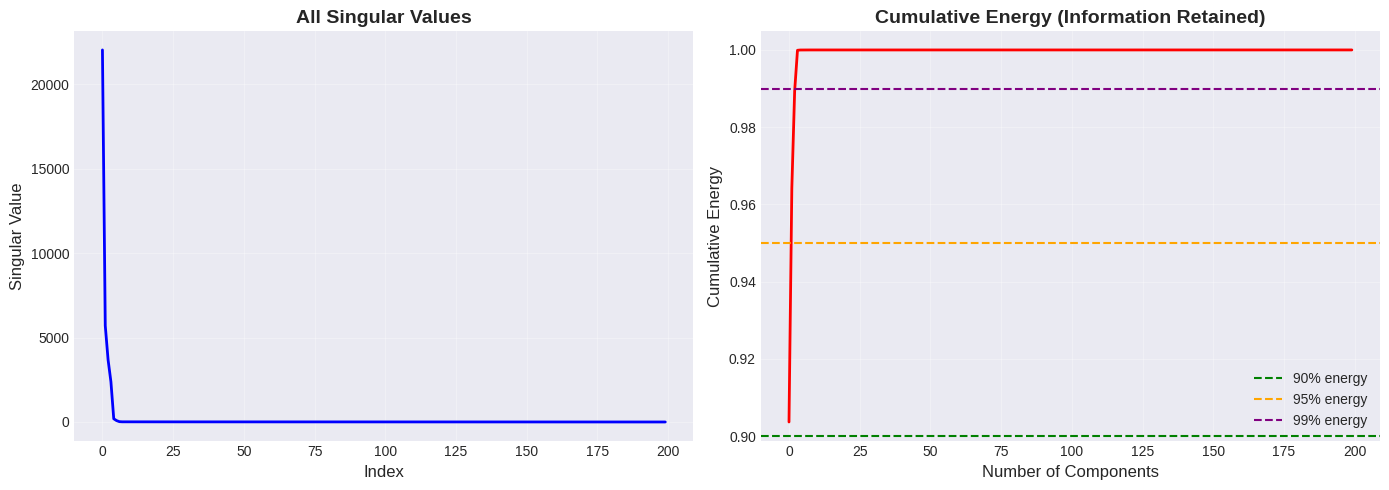


For 90% energy: need 1 components
Storage ratio: 1.00% of original
Compression: 99.75x

For 95% energy: need 2 components
Storage ratio: 2.00% of original
Compression: 49.88x

For 99% energy: need 4 components
Storage ratio: 4.01% of original
Compression: 24.94x


In [17]:
# Visualize singular values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot all singular values
ax = axes[0]
ax.plot(s, 'b-', linewidth=2)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Singular Value', fontsize=12)
ax.set_title('All Singular Values', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Plot cumulative energy
ax = axes[1]
cumulative_energy = np.cumsum(s**2) / np.sum(s**2)
ax.plot(cumulative_energy, 'r-', linewidth=2)
ax.axhline(y=0.9, color='g', linestyle='--', label='90% energy')
ax.axhline(y=0.95, color='orange', linestyle='--', label='95% energy')
ax.axhline(y=0.99, color='purple', linestyle='--', label='99% energy')
ax.set_xlabel('Number of Components', fontsize=12)
ax.set_ylabel('Cumulative Energy', fontsize=12)
ax.set_title('Cumulative Energy (Information Retained)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find how many components for different energy levels
for energy_level in [0.9, 0.95, 0.99]:
    k = np.argmax(cumulative_energy >= energy_level) + 1
    compression_ratio = (k * (img.shape[0] + img.shape[1] + 1)) / img.size
    print(f"\nFor {energy_level*100:.0f}% energy: need {k} components")
    print(f"Storage ratio: {compression_ratio:.2%} of original")
    print(f"Compression: {1/compression_ratio:.2f}x")

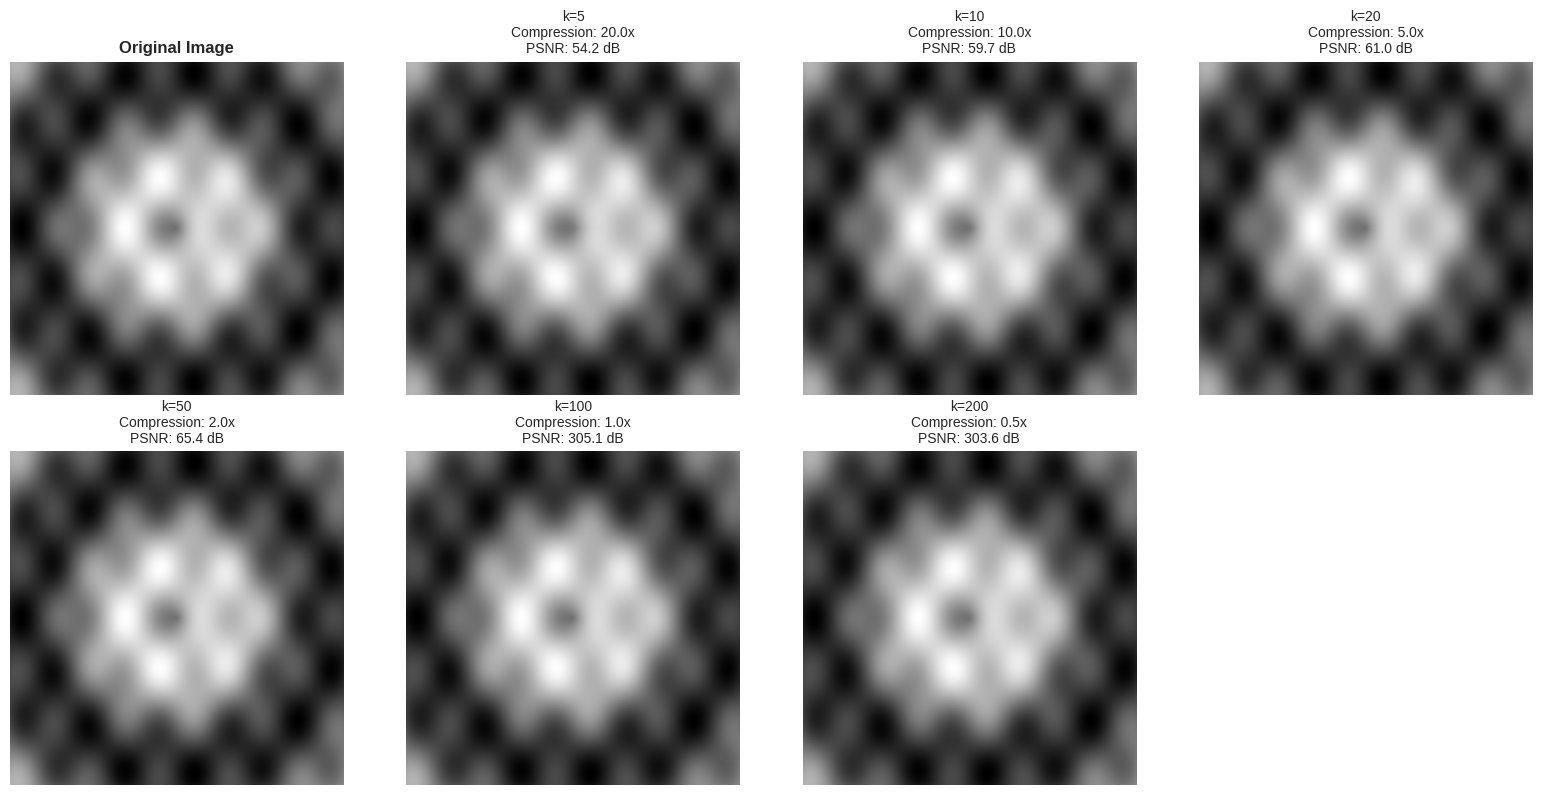

In [18]:
# Reconstruct image with different numbers of components
def compress_image(U, s, VT, k):
    """
    Reconstruct image using only k singular values.
    """
    return U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]

# Try different compression levels
k_values = [5, 10, 20, 50, 100, 200]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Original
ax = axes[0]
ax.imshow(img, cmap='gray')
ax.set_title('Original Image', fontsize=12, fontweight='bold')
ax.axis('off')

# Compressed versions
for idx, k in enumerate(k_values):
    img_compressed = compress_image(U, s, VT, k)
    
    # Compute compression metrics
    compression_ratio = (k * (img.shape[0] + img.shape[1] + 1)) / img.size
    mse = np.mean((img - img_compressed)**2)
    psnr = 10 * np.log10(255**2 / mse)
    
    ax = axes[idx + 1]
    ax.imshow(img_compressed, cmap='gray', vmin=0, vmax=255)
    ax.set_title(f'k={k}\nCompression: {1/compression_ratio:.1f}x\nPSNR: {psnr:.1f} dB', 
                fontsize=10)
    ax.axis('off')

# Hide last subplot if we have one
if len(k_values) < 7:
    axes[7].axis('off')

plt.tight_layout()
plt.show()

## 8. Principal Component Analysis (PCA) <a name="pca"></a>

### What is PCA?

Principal Component Analysis (PCA) is one of the most widely used techniques in machine learning and data analysis for:
- **Dimensionality Reduction**: Reducing high-dimensional data to a smaller number of dimensions while preserving as much information as possible
- **Feature Extraction**: Finding new "features" that are combinations of the original features and capture the most important variance in the data
- **Data Visualization**: Projecting high-dimensional data into 2D or 3D for visualization and exploration
- **Noise Reduction**: By keeping only components with large variance and discarding those with small variance (which are likely noise)
- **Uncorrelation**: Creating new variables that are uncorrelated with each other

### The Core Idea

PCA finds new coordinate axes (principal components) aligned with the **directions of maximum variance** in the data. The first principal component points in the direction of maximum variance, the second perpendicular to the first in the direction of second-maximum variance, and so on.

**Intuition**: Imagine data scattered in a cloud. PCA finds the "stretching" directions of that cloud. If the cloud is elongated in one direction, PCA will place its first axis along that direction because most of the "action" is there.

### Deep Connection to SVD

PCA is **mathematically equivalent** to SVD applied to centered data! This isn't a coincidence—it's a fundamental relationship.

**The PCA-SVD Algorithm**:

**Avoiding Multicollinearity**: In regression, correlated features are problematic. PCA creates uncorrelated features automatically

1. **Center the data** (subtract the mean from each feature):

   $$X_{centered} = X - \mathbf{1}\bar{\mathbf{x}}^T$$**Feature Engineering**: Create new uncorrelated features from correlated raw features

   where $\bar{\mathbf{x}} = \frac{1}{n}\sum_{i=1}^{n} \mathbf{x}_i$ is the mean vector

**Noise Reduction**: Small singular values typically represent noise. By discarding them, we automatically denoise the data

2. **Compute SVD of the centered data**:

   $$X_{centered} = U\Sigma V^T$$**Visualization**: Project 1000-dimensional data to 2D and plot it to understand structure and clusters



3. **Extract Principal Components**: The columns of $V$ ARE the principal components!- Risk of overfitting: Fewer features may reduce model complexity

   - $V_1$ (first column) points in the direction of maximum variance- Training time: Faster model training

   - $V_2$ (second column) points in the direction of second-maximum variance, orthogonal to $V_1$- Storage: Less memory needed to store data

   - And so on...- Computational cost: Fewer features means faster algorithms

**Dimensionality Reduction**: Instead of using all original features, use only the first $k$ principal components that capture, say, 95% of the variance. This reduces:

4. **Compute Explained Variance**: The singular values directly give us the variance explained by each component:

   $$\text{variance explained by PC}_i = \frac{\sigma_i^2}{n-1}$$### Why Use PCA?

   $$\text{explained variance ratio}_i = \frac{\sigma_i^2}{\sum_j \sigma_j^2}$$

   where $Z$ contains the coordinates in the principal component space

5. **Project Data**: Transform data to the new coordinate system:   $$Z = X_{centered}V$$

In [19]:
# Generate sample data
np.random.seed(42)

# Create correlated 2D data
n_samples = 300
mean = [0, 0]
cov = [[3, 2],
       [2, 2]]
X = np.random.multivariate_normal(mean, cov, n_samples)

print(f"Data shape: {X.shape}")
print(f"Data mean: {np.mean(X, axis=0)}")
print(f"\nCovariance matrix:\n{np.cov(X.T)}")

Data shape: (300, 2)
Data mean: [0.0248 0.0057]

Covariance matrix:
[[2.8906 1.9188]
 [1.9188 1.8937]]


In [ ]:
# Perform PCA manually using SVD
# Step 1: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 2: Compute SVD
U, s, VT = np.linalg.svd(X_centered, full_matrices=False)

# Principal components are columns of V
V = VT.T
principal_components = V

print("Principal Components (columns of V):")
print(principal_components)

# Explained variance
explained_variance = (s**2) / (n_samples - 1)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

print("\nExplained variance:")
print(explained_variance)

print("\nExplained variance ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

# Project data onto principal components
X_pca = X_centered @ principal_components

print(f"\nProjected data shape: {X_pca.shape}")
print(f"Projected data mean: {np.mean(X_pca, axis=0)}")
print(f"Projected data std: {np.std(X_pca, axis=0)}")

Principal Components (columns of V):
[[ 0.791   0.6118]
 [ 0.6118 -0.791 ]]

Explained variance:
[4.3746 0.4096]

Explained variance ratio:
PC1: 0.9144 (91.44%)
PC2: 0.0856 (8.56%)

Projected data shape: (300, 2)
Projected data mean: [0. 0.]
Projected data std: [2.0881 0.639 ]


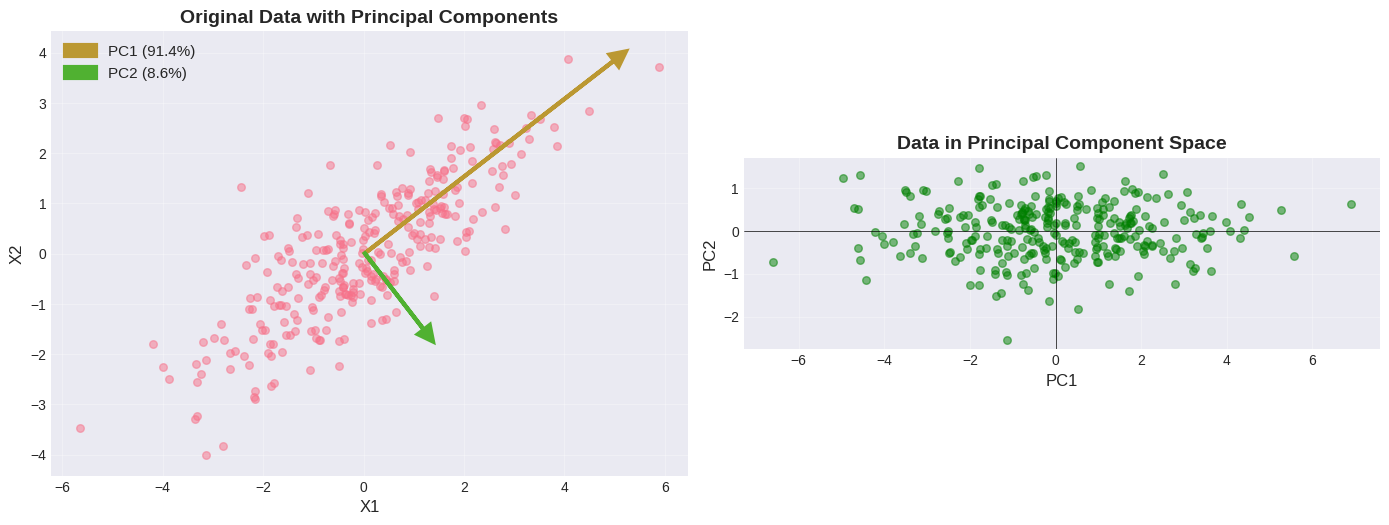

In [21]:
# Visualize PCA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original data with principal components
ax = axes[0]
ax.scatter(X[:, 0], X[:, 1], alpha=0.5, s=30)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)
ax.set_title('Original Data with Principal Components', fontsize=14, fontweight='bold')

# Plot principal components
origin = np.mean(X, axis=0)
for i in range(2):
    direction = principal_components[:, i] * np.sqrt(explained_variance[i]) * 3
    ax.arrow(origin[0], origin[1], direction[0], direction[1],
            head_width=0.3, head_length=0.3, fc=f'C{i+1}', ec=f'C{i+1}',
            linewidth=3, label=f'PC{i+1} ({explained_variance_ratio[i]*100:.1f}%)')

ax.legend(fontsize=11)

# Projected data (in PC space)
ax = axes[1]
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=30, c='green')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_title('Data in Principal Component Space', fontsize=14, fontweight='bold')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

### PCA for Dimensionality Reduction

In [ ]:
# Generate 3D data
np.random.seed(42)
n_samples = 300

# Create 3D data that's mostly in a plane
t = np.linspace(0, 4*np.pi, n_samples)
X_3d = np.zeros((n_samples, 3))
X_3d[:, 0] = np.sin(t) + 0.1*np.random.randn(n_samples)
X_3d[:, 1] = np.cos(t) + 0.1*np.random.randn(n_samples)
X_3d[:, 2] = 0.1*np.random.randn(n_samples)  # Small variation in z

print(f"3D Data shape: {X_3d.shape}")

# Perform PCA
X_3d_centered = X_3d - np.mean(X_3d, axis=0)
U, s, VT = np.linalg.svd(X_3d_centered, full_matrices=False)

explained_variance_3d = (s**2) / (n_samples - 1)
explained_variance_ratio_3d = explained_variance_3d / np.sum(explained_variance_3d)

print("\nExplained variance ratio:")
for i, ratio in enumerate(explained_variance_ratio_3d):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nCumulative variance explained by first 2 PCs: {np.sum(explained_variance_ratio_3d[:2])*100:.2f}%")

3D Data shape: (300, 3)

Explained variance ratio:
PC1: 0.4992 (49.92%)
PC2: 0.4913 (49.13%)
PC3: 0.0095 (0.95%)

Cumulative variance explained by first 2 PCs: 99.05%


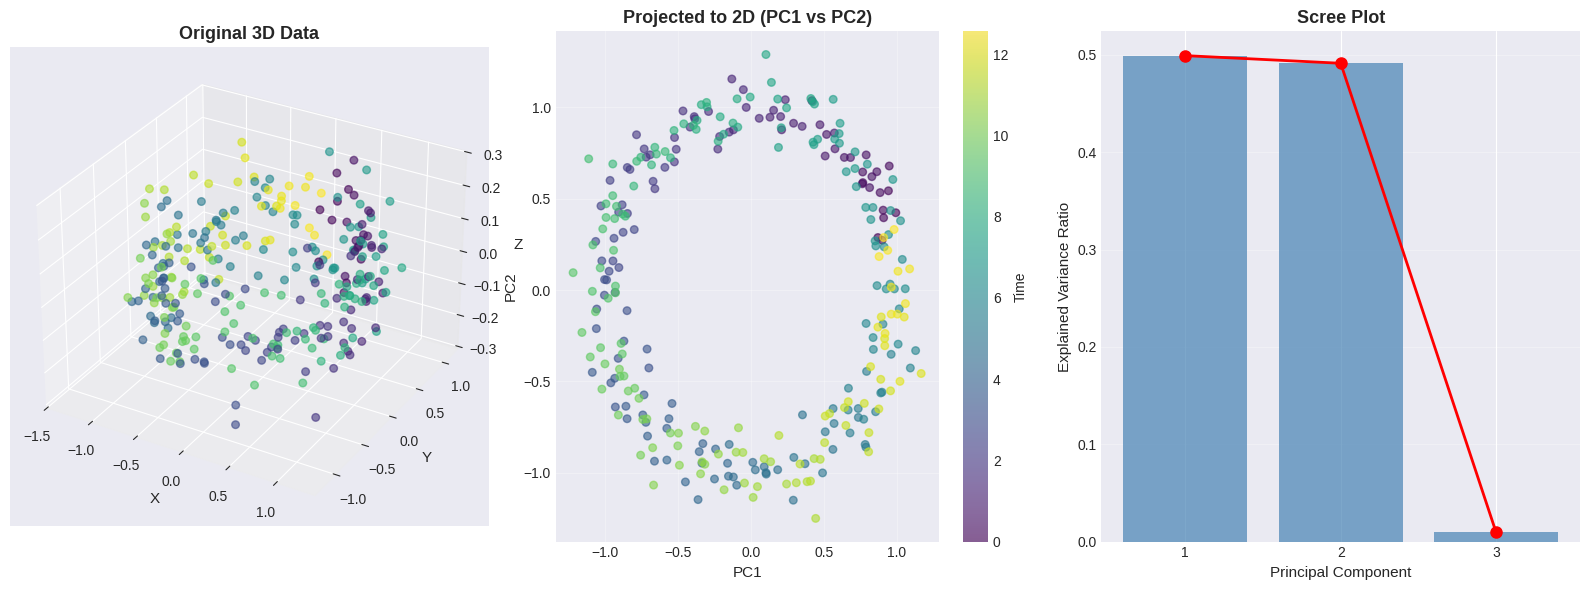

In [23]:
# Visualize 3D data and reduction to 2D
fig = plt.figure(figsize=(16, 6))

# 3D plot
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
          c=t, cmap='viridis', s=30, alpha=0.6)
ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_zlabel('Z', fontsize=11)
ax.set_title('Original 3D Data', fontsize=13, fontweight='bold')

# Project to 2D using first 2 PCs
V = VT.T
X_2d = X_3d_centered @ V[:, :2]

ax = fig.add_subplot(132)
scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=t, cmap='viridis', s=30, alpha=0.6)
ax.set_xlabel('PC1', fontsize=11)
ax.set_ylabel('PC2', fontsize=11)
ax.set_title('Projected to 2D (PC1 vs PC2)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Time')

# Scree plot
ax = fig.add_subplot(133)
ax.bar(range(1, 4), explained_variance_ratio_3d, alpha=0.7, color='steelblue')
ax.plot(range(1, 4), explained_variance_ratio_3d, 'ro-', linewidth=2, markersize=8)
ax.set_xlabel('Principal Component', fontsize=11)
ax.set_ylabel('Explained Variance Ratio', fontsize=11)
ax.set_title('Scree Plot', fontsize=13, fontweight='bold')
ax.set_xticks(range(1, 4))
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 9. Advanced Topics & Practical Algorithms <a name="advanced"></a>

This section explores powerful numerical techniques and sophisticated concepts that form the foundation of modern computational linear algebra.

### 9.1 Power Iteration Method


- **Large-Scale Linear Algebra**: Works on sparse matrices where full eigendecomposition is infeasible

An iterative method to find the dominant eigenvector (eigenvector with largest eigenvalue).
**Why is this useful?**- **Spectral Clustering**: Finding dominant clusters in graph data

- Computing all eigenvalues via the characteristic polynomial is expensive and numerically unstable for large matrices- **Social Networks**: Finding influential nodes in large networks

- For many applications (like PageRank), we only need the dominant eigenvector- **Google PageRank**: Finds the most important web pages using power iteration on the web graph

- Power iteration is scalable to very large sparse matrices (common in real applications)**Real-World Applications**:

- It doesn't require storing the entire matrix in memory for dense matrices

**How It Works**: Starting with a random vector, we repeatedly multiply by the matrix $A$. Each iteration amplifies the component along the dominant eigenvector while dampening components along other eigenvectors. Eventually, the vector converges to the dominant eigenvector.

Matrix A:
[[ 4 -2]
 [ 1  1]]

Power Iteration Results:
Dominant eigenvalue: 3.000000
Dominant eigenvector: [0.8944 0.4472]

NumPy Results:
Dominant eigenvalue: 3.000000
Dominant eigenvector: [0.8944 0.4472]


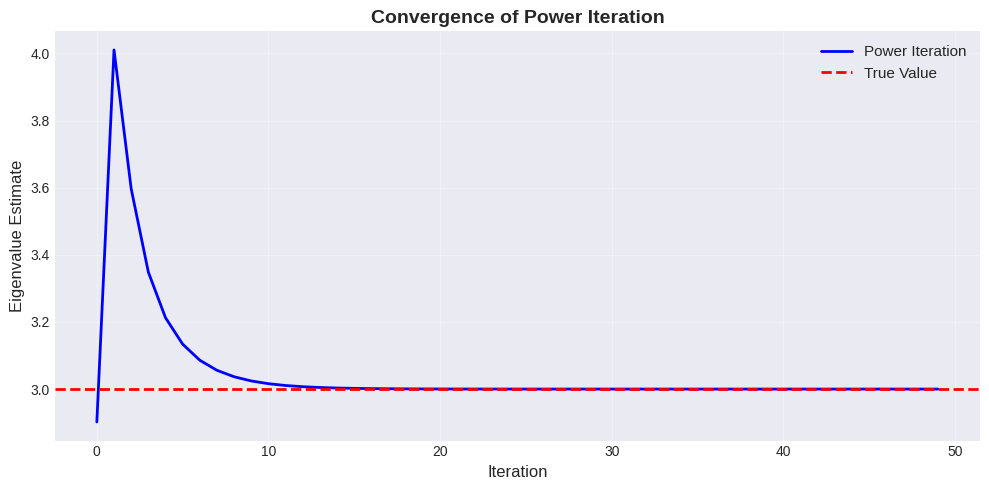

In [24]:
def power_iteration(A, num_iterations=100):
    """
    Find dominant eigenvector using power iteration.
    """
    n = A.shape[0]
    
    # Random initial vector
    v = np.random.randn(n)
    v = v / np.linalg.norm(v)
    
    eigenvalues_history = []
    
    for i in range(num_iterations):
        # Multiply by A
        v_new = A @ v
        
        # Compute eigenvalue estimate (Rayleigh quotient)
        eigenvalue = v.T @ A @ v
        eigenvalues_history.append(eigenvalue)
        
        # Normalize
        v_new = v_new / np.linalg.norm(v_new)
        
        # Check convergence
        if np.linalg.norm(v_new - v) < 1e-10:
            print(f"Converged in {i+1} iterations")
            break
        
        v = v_new
    
    return eigenvalue, v, eigenvalues_history

# Test power iteration
A = np.array([[4, -2],
              [1,  1]])

print("Matrix A:")
print(A)

eigenvalue_pi, eigenvector_pi, history = power_iteration(A, num_iterations=50)

print(f"\nPower Iteration Results:")
print(f"Dominant eigenvalue: {eigenvalue_pi:.6f}")
print(f"Dominant eigenvector: {eigenvector_pi}")

# Compare with numpy
eigenvalues_np, eigenvectors_np = np.linalg.eig(A)
max_idx = np.argmax(np.abs(eigenvalues_np))

print(f"\nNumPy Results:")
print(f"Dominant eigenvalue: {eigenvalues_np[max_idx]:.6f}")
print(f"Dominant eigenvector: {eigenvectors_np[:, max_idx]}")

# Plot convergence
plt.figure(figsize=(10, 5))
plt.plot(history, 'b-', linewidth=2, label='Power Iteration')
plt.axhline(y=eigenvalues_np[max_idx], color='r', linestyle='--', 
           linewidth=2, label='True Value')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Eigenvalue Estimate', fontsize=12)
plt.title('Convergence of Power Iteration', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 9.2 Condition Number and Numerical Stability

When solving linear systems like $A\mathbf{x} = \mathbf{b}$ on computers, errors are inevitable due to floating-point arithmetic. The **condition number** measures how much these small errors get amplified in the solution—it's a measure of numerical stability and reliability.

**Definition**: The condition number is defined using singular values as:

$$\kappa(A) = \frac{\sigma_{\max}}{\sigma_{\min}}$$

where:
- $\sigma_{\max}$ is the largest singular value

- $\sigma_{\min}$ is the smallest non-zero singular value4. **Numerical Differentiation**: Approximating derivatives is inherently ill-conditioned

3. **Nearly Singular Matrices**: Matrix is close to rank-deficient

**Interpretation of Condition Numbers**:2. **Ill-Scaled Problems**: Features with vastly different ranges

1. **Polynomial Fitting**: Vandermonde matrices become ill-conditioned for high degrees

- **$\kappa(A) = 1$**: Perfect condition (orthogonal matrix)**Common Sources of Poor Conditioning**:

  - No amplification of errors

  - Always numerically stable- **Engineering**: Ill-conditioned systems often indicate the physical problem is inadequately specified or the model needs refinement

  - Example: Rotation matrices- **Machine Learning**: Ill-conditioned feature matrices cause training instabilities; normalization and regularization help

  - **Scientific Computing**: Always check $\kappa(A)$ before trusting your solution

- **$\kappa(A) \in [1, 10^2]$**: Well-conditioned- **High condition number**: A tiny perturbation in input becomes a huge error in output

  - Small input errors produce small output errors**Practical Implications**:

  - Safe to use standard algorithms

  $$\frac{||\Delta\mathbf{x}||}{||\mathbf{x}||} \leq \kappa(A) \frac{||\Delta\mathbf{b}||}{||\mathbf{b}||}$$

- **$\kappa(A) \in [10^2, 10^8]$**: Moderately ill-conditioned

  - Errors are amplified, but often manageable**Error Amplification Formula**: If we have a perturbation $\Delta\mathbf{b}$ in the right-hand side $\mathbf{b}$, the relative error in the solution is amplified by at most:

  - May require careful numerical algorithm selection

    - May need regularization, reformulation, or higher precision arithmetic

- **$\kappa(A) > 10^{10}$**: Severely ill-conditioned (numerically unstable)  - Often indicates the problem is poorly formulated

  - Large amplification of input errors  - Results may be unreliable

In [ ]:
# Well-conditioned vs ill-conditioned matrices

# Well-conditioned (identity)
A_good = np.eye(3)

# Ill-conditioned (Hilbert matrix)
n = 5
A_bad = np.array([[1/(i+j+1) for j in range(n)] for i in range(n)])

print("Well-conditioned matrix (Identity):")
print(A_good)
U, s, VT = np.linalg.svd(A_good)
print(f"Singular values: {s}")
print(f"Condition number: {np.linalg.cond(A_good):.2e}")

print("\n" + "="*60)
print("\nIll-conditioned matrix (Hilbert):")
print(A_bad)
U, s, VT = np.linalg.svd(A_bad)
print(f"\nSingular values: {s}")
print(f"Condition number: {np.linalg.cond(A_bad):.2e}")

# Demonstrate numerical instability
b = np.ones(n)
x = np.linalg.solve(A_bad, b)

# Add small perturbation to b
b_perturbed = b + 1e-10 * np.random.randn(n)
x_perturbed = np.linalg.solve(A_bad, b_perturbed)

print(f"\nSolution sensitivity:")
print(f"Relative change in b: {np.linalg.norm(b - b_perturbed)/np.linalg.norm(b):.2e}")
print(f"Relative change in x: {np.linalg.norm(x - x_perturbed)/np.linalg.norm(x):.2e}")
print(f"\nAmplification factor: {(np.linalg.norm(x - x_perturbed)/np.linalg.norm(x)) / (np.linalg.norm(b - b_perturbed)/np.linalg.norm(b)):.2e}")

Well-conditioned matrix (Identity):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Singular values: [1. 1. 1.]
Condition number: 1.00e+00


Ill-conditioned matrix (Hilbert):
[[1.     0.5    0.3333 0.25   0.2   ]
 [0.5    0.3333 0.25   0.2    0.1667]
 [0.3333 0.25   0.2    0.1667 0.1429]
 [0.25   0.2    0.1667 0.1429 0.125 ]
 [0.2    0.1667 0.1429 0.125  0.1111]]

Singular values: [1.5671 0.2085 0.0114 0.0003 0.    ]
Condition number: 4.77e+05

Solution sensitivity:
Relative change in b: 8.39e-11
Relative change in x: 1.27e-08

Amplification factor: 1.51e+02


### 9.3 Eigendecomposition vs SVD Comparison

In [ ]:
# Create comparison table
import pandas as pd

comparison_data = {
    'Property': [
        'Applicable to',
        'Decomposition',
        'Components',
        'Orthogonality',
        'Real values',
        'Uniqueness',
        'Computational cost',
        'Numerical stability',
        'Main applications'
    ],
    'Eigendecomposition': [
        'Square matrices only',
        'A = PDP⁻¹',
        'Eigenvalues, eigenvectors',
        'Only for symmetric matrices',
        'Only for symmetric matrices',
        'Not unique (scaling)',
        'O(n³)',
        'Can be unstable',
        'Dynamics, stability, PageRank'
    ],
    'SVD': [
        'Any matrix (m×n)',
        'A = UΣVᵀ',
        'Singular values, vectors',
        'Always orthogonal',
        'Always non-negative',
        'Unique (up to sign)',
        'O(mn²)',
        'Very stable',
        'Compression, PCA, least squares'
    ]
}

df = pd.DataFrame(comparison_data)
print(df.to_string(index=False))

           Property            Eigendecomposition                             SVD
      Applicable to          Square matrices only                Any matrix (m×n)
      Decomposition                     A = PDP⁻¹                        A = UΣVᵀ
         Components     Eigenvalues, eigenvectors        Singular values, vectors
      Orthogonality   Only for symmetric matrices               Always orthogonal
        Real values   Only for symmetric matrices             Always non-negative
         Uniqueness          Not unique (scaling)             Unique (up to sign)
 Computational cost                         O(n³)                          O(mn²)
Numerical stability               Can be unstable                     Very stable
  Main applications Dynamics, stability, PageRank Compression, PCA, least squares


## Summary and Key Takeaways

### Eigenvalues and Eigenvectors: Foundations
1. **Definition**: Eigenvectors are special directions that remain unchanged (up to scaling) when a matrix transformation is applied
2. **Scaling Factors**: Eigenvalues quantify how much stretching or compression occurs along each eigenvector
3. **Diagonalization**: When applicable, matrices can be decomposed as $A = PDP^{-1}$, making computations efficient
4. **Limited Scope**: Only applies to square matrices; doesn't always exist
5. **Real Applications**:
   - **PageRank**: Google ranks web pages using the dominant eigenvector of the web graph
   - **Stability Analysis**: Eigenvalues determine if mechanical/dynamic systems are stable
   - **Quantum Mechanics**: Energy levels of atoms are eigenvalues of the Hamiltonian operator
   - **Vibration Analysis**: Natural frequencies of bridges, aircraft, machinery are eigenvalues
   - **Facial Recognition**: Eigenfaces use eigenvector decomposition

### Singular Value Decomposition: The Universal Tool
1. **Universality**: Works for ANY matrix of any shape (rectangular or square)
2. **Decomposition**: $A = U\Sigma V^T$ breaks any transformation into rotation → scaling → rotation
3. **Singular Values**: Ordered non-negative values measuring relative importance of each "mode" or direction
4. **Always Stable**: Numerically robust computation; works even with singular/near-singular matrices
5. **Versatile Applications**:
   - **Data Compression**: Image and audio compression using low-rank approximation
   - **Recommender Systems**: Matrix factorization for collaborative filtering
   - **Pseudoinverse**: Solving least-squares problems when exact solutions don't exist
   - **Noise Reduction**: Denoising by discarding small singular values
   - **Basis for Other Methods**: Foundation for PCA and many machine learning algorithms

### Principal Component Analysis: Data Science Tool
1. **Goal**: Find directions (principal components) along which data varies most
2. **SVD Connection**: PCA is essentially SVD applied to mean-centered data
3. **Variance Preservation**: Keep top $k$ components that capture 90-99% of variance
4. **Applications**:
   - **Dimensionality Reduction**: Reduce 1000 features to 10-50 while retaining 95% of information

   - **Visualization**: Project high-D data to 2D/3D for exploration and pattern discovery- Krylov subspace methods (GMRES, LSQR)

   - **Feature Engineering**: Create uncorrelated features from correlated raw data- QR algorithm and its variants

   - **Data Preprocessing**: Normalize and decorrelate features for machine learning- Lanczos and Arnoldi iteration algorithms

   - **Anomaly Detection**: Points far from low-D reconstruction are likely anomalies- Sparse eigenvalue problems

- Randomized SVD (for large-scale problems)

### Condition Number: Practical Reliability**Advanced Topics** (when you're ready):

1. **Measures**: How sensitive solutions are to input perturbations

2. **Formula**: $\kappa(A) = \frac{\sigma_{max}}{\sigma_{min}}$- Computer Vision (PCA for faces): https://en.wikipedia.org/wiki/Eigenface

3. **Interpretation**:- Google PageRank: https://en.wikipedia.org/wiki/PageRank

   - $\kappa = 1$: Perfect (orthogonal matrices)- Collaborative Filtering: https://en.wikipedia.org/wiki/Collaborative_filtering

   - $\kappa < 100$: Generally well-behaved**Practical Applications**:

   - $\kappa > 10^{10}$: Numerically problematic

4. **Practical Impact**: Always check condition number before trusting computed solutions- Numpy/Scipy linear algebra: https://numpy.org/doc/stable/reference/routines.linalg.html

- Scikit-learn PCA documentation: https://scikit-learn.org/stable/modules/decomposition.html

### Quick Decision Guide- 3Blue1Brown's Essence of Linear Algebra: https://www.youtube.com/watch?v=PFDu9oVAE-g (amazing visual intuition)

**Online Resources**:

| Problem | Best Tool | Why |

|---------|-----------|-----|- Boyd & Vandenberghe: "Convex Optimization" (applications in optimization)

| Square matrix, need eigenvalues | `np.linalg.eig()` | Direct, specialized for matrices with eigendecomposition |- Trefethen & Bau: "Numerical Linear Algebra" (rigorous, computational focus)

| Any matrix decomposition | SVD | Always works, numerically stable |- Gilbert Strang: "Linear Algebra and Its Applications" (accessible, geometric intuition)

| Compress image/data | SVD | Keep top-$k$ singular values |**Foundational Textbooks**:

| Reduce dimensions | PCA (via SVD) | Optimal variance preservation |

| Solve under/over-determined system | Pseudoinverse (via SVD) | Guaranteed solution |## Further Reading and Resources

| Find dominant eigenvector only | Power iteration | Scalable for sparse matrices |

| Check numerical stability | Condition number | Predicts solution reliability |---



### Practical Implementation Tips- Work with normalized/scaled data when possible

- Use SVD-based methods (more stable than direct eigendecomposition)

**For Eigendecomposition**:- If $\kappa > 10^8$, consider regularization or problem reformulation

- Use only for square matrices- Check condition number $\kappa(A)$ before trusting solution

- Check if matrix is symmetric (then all eigenvalues are real)**For Numerical Stability**:

- Verify eigenvector properties: $A\mathbf{v} = \lambda\mathbf{v}$

- Watch for outliers that can distort PCA

**For SVD**:- Use scree plot to determine number of components needed

- Always exists; numerically stable- Normalize if features have different scales

- Use `full_matrices=False` for large matrices to save memory- Always center data first! ($X - \bar{X}$)

- Singular values ordered in decreasing magnitude automatically**For PCA**:



**For Compression**:- SVD is optimal by Eckart-Young theorem

- Plot cumulative energy to choose optimal rank $k$- Keep components explaining 90-99% of variance